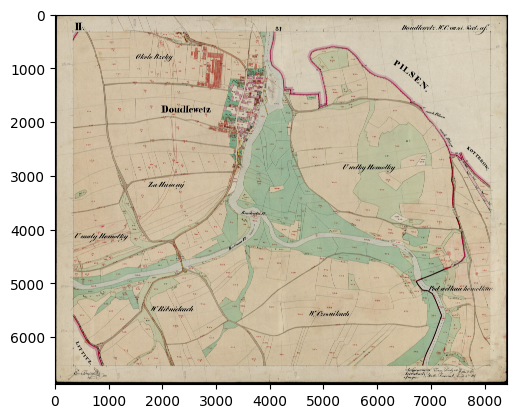

In [162]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

# A command line argument.
input_name = "C:/Users/dartixus/PycharmProjects/kiv-zvi/SP/data_katastr/UAZK-B2-a-04-C-1428-002.JPG"

# It reads the image from the file and converts it to grayscale.
# img = (cv2.imread(input_name, cv2.IMREAD_GRAYSCALE))
img = cv2.cvtColor((cv2.imread(input_name,  cv2.COLOR_BGR2RGB)),  cv2.COLOR_BGR2RGB)

assert img is not None, "file could not be read, check with os.path.exists()"
# A Canny edge detector.
# img = cv2.Canny(img, 1, 500)
plt.imshow(img)



In [154]:
# Taking the right 90% of the image.
right_border = int(img.shape[1] * 0.9)
# Taking the left 10% of the image.
left_border = int(img.shape[1] * 0.1)
# Taking the bottom 90% of the image.
bottom_border = int(img.shape[0] * 0.9)
# Taking the top 10% of the image.
top_border = int(img.shape[0] * 0.1)

# Taking the right, left, bottom and top border of the image.
right_border = img[:, right_border:]
left_border = img[:, :left_border]
bottom_border = img[bottom_border:, :]
top_border = img[:top_border, :]
print(top_border.shape)

(688, 8418)


In [155]:
def euclidean_2D(x1, x2, y1, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

# Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(0)

# Detect lines in the image
lines = lsd.detect(top_border)[0]  # Position 0 of the returned tuple are the detected lines
lines = np.squeeze(lines)
distances = np.array([euclidean_2D(i[0], i[2], i[1], i[3],)  for i in lines])

In [156]:

print(distances.shape)
longest_line_index = np.argpartition(distances, -20)[-20:]
print(longest_line_index)
longest_lines = lines[longest_line_index]
longest_lines = longest_lines.astype(int)
print(longest_lines)

(3267,)
[ 514  206   75 3030 1136  364  458 3050 2245 1769 1462 2019   21 3032
 2266 3031  524 2061 1561  110]
[[ 579  324  726  642]
 [4093  338 4026  684]
 [8380  403 8381   48]
 [8375   15 7890   13]
 [ 726  686  563  334]
 [4673  322 5191  322]
 [5195  341 4673  341]
 [8400   49 8398  685]
 [3696   35 2233   35]
 [1166   35   44   35]
 [  40   16 6626   14]
 [7503   12 5451   12]
 [  20  684   23   31]
 [6629   13 7503   15]
 [2184   35 1168   35]
 [3048   13   36   13]
 [8376   36 7470   35]
 [5444   12 3050   13]
 [7505   15 8376   17]
 [  42   36   40  683]]


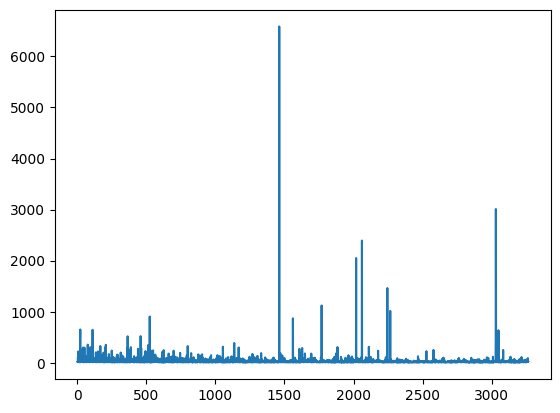

In [157]:
plt.plot(np.arange(0, len(distances)), distances)

In [149]:

# It creates a white image with the same size as the input image.
white = np.zeros_like(top_border)
white[:] = 255

(688, 8418)


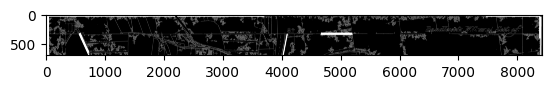

In [158]:

# Draw detected lines in the image
for i in longest_lines:
    top_border = cv2.line(top_border, (i[0], i[1]), (i[2], i[3]), (255,0,0),20)
print(top_border.shape)
# It converts the image from BGR to grayscale.
# drawn_img = cv2.cvtColor(white, cv2.COLOR_BGR2GRAY)
plt.imshow(top_border, cmap='gray')


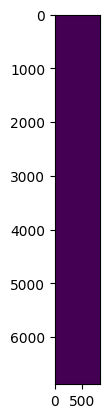

In [92]:

# Showing the image.
plt.imshow(right_border)
plt.show()

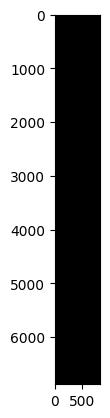

In [93]:

plt.imshow(left_border, cmap='gray')
plt.show()

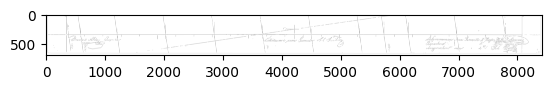

In [ ]:

plt.imshow(bottom_border, cmap='gray')
plt.show()

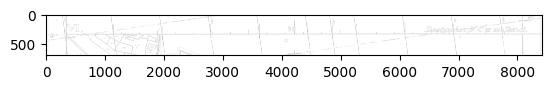

In [ ]:

plt.imshow(top_border, cmap='gray')
plt.show()

